# Lab exercise #1: Credit scoring

You are asked in this exercise to build a scoring model with data for a large number of firms, see the file data scoring.csv. In particular, for each year you have an indicator variable equal to one if the firm defaults and equal to zero if the firm survives during the following 12 months. Estimate a logit model with this indicator being the dependent variable $Y_i$. The explanatory variables are financial ratios of the firm - working capital over total assets, retained earnings over total assets, EBIT over total assets, market value of equity over total liabilities, sales over total assets.  
The Logit model is given by $$ Prob(Y_i = 1) = \frac{1}{1+e^{-\beta'x_i}}$$  
In other words, the score is a linear combination of the explanatory variables $x_i, i = 0, 1, ... , 5$ where $x_0$ is a column of ones and $x_1$ to $x_5$ are the data for the five explanatory variables.

**a)** Estimate the logit model. Report the coeficient estimates, their standard errors, t-ratios, p-values, pseudo R-squared and a log likelihood ratio test with respect to a model with a constant only.

In [2]:
import statsmodels.api as sm
import pandas as pd

#importing and formating the data frame
df=pd.read_csv('data_scoring.csv',sep=';')#place the csv file in the same directory as the jupiter notebook

y=df['Default'].astype(float)

X=df[['WC/TA','RE/TA','EBIT/TA','ME/TL','S/TA']]

X=X.replace(',','.', regex=True)

X[X.columns]=X[X.columns].astype(float)

In [3]:
#full model
logit1 = sm.Logit(y,sm.add_constant(X))
lg1 = logit1.fit()
lg1.summary()



Optimization terminated successfully.
         Current function value: 0.070174
         Iterations 11


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            5
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                  0.2216
Time:                        12:46:04   Log-Likelihood:                -280.70
converged:                       True   LL-Null:                       -360.60
Covariance Type:            nonrobust   LLR p-value:                 1.089e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5508      0.266     -9.588      0.000      -3.072      -2.029
WC/TA          0.4188      0.573      0.730      0.465      -0.705       1.543
RE/TA         -1.4533      0.229     -6.339      0.000      -1.903      -1.004
EBIT/TA       -7.8836      2.713     -2.906      0.004     -13.200      -2.567
ME/TL         -1.5917      0.323     -4.925      0.000      -2.225      -0.958
S/TA           0.6253      0.349      1.792      0.073      -0.059       1.309
==============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

_The log likelihood ratio of the full model is given under (Log-Likelihood: -280.70)_  
_The log likelihood ratio of the model with just a constant is given under (LL-Null: -360.60)_  
_p value of the log likelihood ratio test is given under (LLR p-value:	1.089e-32), which means that the improvment of a full model in comparison to a model with just a constant is significant._

**b)** Compute analytically the marginal effect of a variable (i.e., you need to take a derivative).   
Compute the marginal effects of each variable for one particular firm and year. What guidance could this effect give you when decide on giving a loan to a company?  
Finally, compute the marginal effect of each variable at the mean.   
(Hint: R has two packages that can help you with that: mfx and margins. If you use the latter you need to compute the mean of each variable first and then apply the margins command to the mean. Perhaps you want to check your solution by plugging in the values to your analytical solution in R.)

_We opted to compute for the first company and for the first date._

_First step would be writing the equation and defining the symbols._

In [4]:
#write the equation

import sympy as sp

#define the symbols
p,b0,b1,b2,b3,b4,b5,x0,x1,x2,x3,x4,x5,prob=sp.symbols('p,b0,b1,b2,b3,b4,b5,x0,x1,x2,x3,x4,x5,prob')



p=sp.Eq(lhs=1/(1+sp.exp(-(b0*x0+b1*x1+b2*x2+b3*x3+b4*x4+b5*x5))),rhs=prob)
p

Eq(1/(exp(-b0*x0 - b1*x1 - b2*x2 - b3*x3 - b4*x4 - b5*x5) + 1), prob)

_Second step would be differenciating eq with respect to a variable you want to compute the corresponding marginal effects for and inserting the values of the varialbes you have in the excel file for x's and betas from the part a)._

In [5]:
#differenciate eq 
sp.diff(p.lhs,x1).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.5,x2:0.31,x3:0.04,x4:0.96,x5:0.33})

0.00487797706705605

**_Guidance for giving a loan_**  
_One unit increase in WC/TA increases probability of default by approx. 0.4% ceteris paribus._

In [6]:
sp.diff(p.lhs,x2).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.5,x2:0.31,x3:0.04,x4:0.96,x5:0.33})

-0.0169273258633060

**_Guidance for giving a loan_**  
_One unit increase in RE/TA decreases probability of default by approx. 1.6% ceteris paribus._

In [7]:
sp.diff(p.lhs,x3).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.5,x2:0.31,x3:0.04,x4:0.96,x5:0.33})

-0.0918243075593196

**_Guidance for giving a loan_**  
_One unit increase in EBIT/TA decreases probability of default by approx. 9.1% ceteris paribus._

In [8]:
sp.diff(p.lhs,x4).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.5,x2:0.31,x3:0.04,x4:0.96,x5:0.33})

-0.0185393412073379

**_Guidance for giving a loan_**  
_One unit increase in ME/TL decreases probability of default by approx. 1.8% ceteris paribus._

In [9]:
sp.diff(p.lhs,x5).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.142577,x2:0.210375,x3:0.051813,x4:1.953933,x5:0.303637})

0.00136118128195292

**_Guidance for giving a loan_**  
One unit increase in RE/TA increases probability of default by approx. 0.0136% ceteris paribus._</font>  


In [15]:
sp.diff(p.lhs,x5).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.5,x2:0.31,x3:0.04,x4:0.96,x5:0.33})

0.00728318782242156

**_Guidance for giving a loan_**  
_One unit increase in S/TA decreases probability of default by approx. 0.72% ceteris paribus._

_In computing mean marginal effects of each variable at mean level, we had just replaced the value for every x with its mean, in comparisson to the previous case._

In [11]:
Liste=[sp.diff(p.lhs,x0).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.142577,x2:0.210375,x3:0.051813,x4:1.953933,x5:0.303637})
,sp.diff(p.lhs,x1).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.142577,x2:0.210375,x3:0.051813,x4:1.953933,x5:0.303637})
,sp.diff(p.lhs,x2).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.142577,x2:0.210375,x3:0.051813,x4:1.953933,x5:0.303637})
,sp.diff(p.lhs,x3).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.142577,x2:0.210375,x3:0.051813,x4:1.953933,x5:0.303637})
,sp.diff(p.lhs,x4).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.142577,x2:0.210375,x3:0.051813,x4:1.953933,x5:0.303637})
,sp.diff(p.lhs,x5).doit().subs({b0:-2.5508,b1:0.4188,b2:-1.4533,b3:-7.8836,b4:-1.5917,b5:0.6253,x0:1,x1:0.142577,x2:0.210375,x3:0.051813,x4:1.953933,x5:0.303637})]

In [16]:
import pandas as pd

pd.DataFrame(Liste,index=['constant','WC/TA','RE/TA','EBIT/TA','ME/TL','S/TA'],columns=['Calculation of mean effects by hand'])

,Calculation of mean effects by hand
constant,-0.00555269664801778
WC/TA,0.000911662755288477
RE/TA,-0.00316360907894160
EBIT/TA,-0.0171613765463043
ME/TL,-0.00346488444983923
S/TA,0.00136118128195292


In [17]:
#python function for calculating the mean effect

lg1.get_margeff(at='mean').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                Default
Method:                          dydx
At:                              mean
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
WC/TA          0.0009      0.001      0.710      0.478      -0.002       0.003
RE/TA         -0.0032      0.002     -1.985      0.047      -0.006      -4e-05
EBIT/TA       -0.0172      0.010     -1.782      0.075      -0.036       0.002
ME/TL         -0.0035      0.001     -3.608      0.000      -0.005      -0.002
S/TA           0.0014      0.001      1.348      0.178      -0.001       0.003
==============================================================================
"""

**c)** Compute the default probability of each firm predicted by the model.  
(Hint: Use the predict command.)

In [18]:
#computing the defalult probability of each firm

from sklearn import metrics
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y,
                               "predicted_prob": lg1.predict( sm.add_constant( X ) ) } )
    return y_pred_df
y_pred_df = get_predictions( y, lg1)



y_pred_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,actual,predicted_prob
0,0.0,0.011786
1,0.0,0.009372
2,0.0,0.017121
3,0.0,0.032357
4,0.0,0.017969
...,...,...
3995,1.0,0.572310
3996,1.0,0.091834
3997,1.0,0.053768
3998,1.0,0.099953


**d)** If the threshold of classifying a firm as not creditworthy vs. creditworthy is at 10% default probability, how many correct and how many incorrect predictions about credit-worthiness would the model make?  
Which of the errors are errors of type I (classifying defaulting firms as surviving), and which ones are of type II (classifying financially sound firms as defaulting ones)?  
(The full 2x2 matrix of wrong and correct predictions is called a confusion matrix.)

In [19]:
#using the 10 percent treshhold
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x >0.1 else 0)

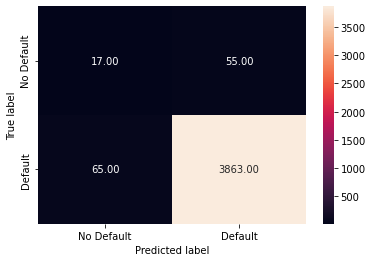

In [20]:
import matplotlib.pylab as plt
import seaborn as sns


def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix(y_true=actual, y_pred=predicted,labels=[1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No Default", "Default"] , yticklabels = ["No Default", "Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
draw_cm( y_pred_df['actual'], y_pred_df['predicted'])

_Model correctly predicts 3.880 cases (3.863 + 17), while misclassifying 65 cases as Type I error and 55 cases as Type II error._

**e)** Instead of using the 10% threshold, a bank could decide to refuse a loan whenever the expected cost of a type I error (the cost of error weighted by the probability that it will occur) exceeds the expected cost of a type II error.   
Assume that the recovery rate is 30% and that a loan not granted to a solvent company entails missed interest earnings equal to 2% of the principal amount, and that all loans would be of the same size.  
What is the minimum score $\beta'x_i$ that a company needs to achieve in order to grant it a loan under this criterion?

_The idea is for a bank to refuse a loan whenever inequality holds_  
$$Prob_\textrm{type I err}*(1-\textrm{Recovery rate})*loan>0.02*loan* Prob_\textrm{type II err}$$
$$Prob_\textrm{type I err}*0.7*loan>0.02*loan*Prob_\textrm{type II err}$$
$$Prob_\textrm{type I err}*0.7>0.02*Prob_\textrm{type II err}$$  
$$Prob_\textrm{type I err} > 0.028571*Prob_\textrm{type II err}$$

In other words bank will give a loan if

$$ 0.028571*Prob_\textrm{type II err}>Prob_\textrm{type I err} $$

_Since the probability of Type I error and probability of type II error have the same denominator, we can replace the probability of Type1/2, as the number of cases that belong to Type1/Type2, which we wil do by grid search:_  
_For every treshold_lev from 1-100% , we will be checking if the number of Type I error is greater than Type II error, and once the Type I is greater than Type II the person will not be issued a loan._
_We would need the first occurence of the variable TRUE, or in other words the lowest p for which the equality holds will get a credit._  
_Once we find the lowest p for which you will not be issued a loan, we will solve the equation to get a z score._

In [21]:
import numpy as np
#creating a Grid of tresh hold levels
tresh=np.arange(0,1.01,0.01)

for i in range(len(tresh)):
    #dynamicall naming of a varialbe
    globals()[f"ped_{i}"] = f"ped_{i}"
    #appending the new col to a dataframe with pred prob
    y_pred_df[globals()[f"ped_{i}"]]=y_pred_df.predicted_prob.map( lambda x: 1 if x >tresh[i] else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


In [67]:
#variable that will hold FALSE-loan is not approved, or TRUE loan is approved
lista=[]
for i in range(4,104):
  #conditon  for getting a loan is that prob_type_2>0.28*prob type 1
    if metrics.confusion_matrix(y_true=y_pred_df['actual'], y_pred=y_pred_df.iloc[:,i],labels=[1,0])[0,1]>0.028571*metrics.confusion_matrix(y_true=y_pred_df['actual'], y_pred=y_pred_df.iloc[:,i],labels=[1,0])[1,0]:
        lista.append(True)
    else:
        lista.append(False)    

In [68]:
#now we need the first occurence of TRUE in our variable lista
lista.index(True)

3

In [69]:
#max tollerated probability of a default
tresh[3]

0.03

In [70]:
#to find the lowest score we need to solve the following equation for the z_star which is minimum zscore
#lowest score
z_star=sp.Symbol('z_star')

sp.Eq(lhs=1/(1+sp.exp(-(z_star))),rhs=tresh[3])

Eq(1/(1 + exp(-z_star)), 0.03)

In [71]:
#lowest score
sp.solve(1/(1+sp.exp(-z_star))-tresh[3],z_star)[0]

-3.47609868983527

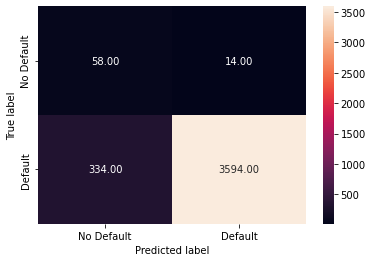

In [72]:
#confusion matrix that meets min requirement to get a loan since 334.00 * 0,028571 < 14.00
draw_cm( y_pred_df['actual'], y_pred_df['ped_4'])